In [1]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from pandas import DataFrame

In [2]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [3]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

The shape of our feature is (177, 7)


In [4]:
#summary statistics
features.describe()
features.columns.values

array(['n [count]', 'H [mm]', 'b [mm]', 'd [mm]', 'γ [N/mm3]', 'Pmax [N]',
       'P0 [N]'], dtype=object)

In [5]:
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)

In [6]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

In [7]:
#target pmax
pmax = np.array(features['Pmax [N]'])
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
features = np.array(features)



#print(features)
print_shape(features)

The shape of our feature is (177, 11)


In [8]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [12]:
rf = RandomForestRegressor(n_estimators = 570, random_state = 141)
rf.fit(train_features, train_labels)
#Make Predictions
#Use the forest's predict method on the test data 
predictions = rf.predict(test_features)

#Calculate the absolute errors
errors = abs(predictions - test_labels)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(predictions)
print(test_labels)

Mean Absolute Error: 3.31 newton.
Accuracy: 85.58 %.
[17.21992978 11.92001236 10.40434901 44.89569405  7.3137539  24.69726919
  7.95013157 54.87558043  8.71795704 16.35550334 13.04993877 19.43078984
 21.05539693  6.35263769 14.4912933  18.59000119 11.84614693 22.87986782
 13.28528695 38.667216   54.46938497 17.86519952 34.01186779 43.53846608
 72.09611808 10.77695994 70.27268137 18.64717622 58.1740802  19.89404466
 28.10122682 12.39055939 20.58309688 12.42776968 44.09446938 18.61189461
 41.63201479  7.13177199  7.91068791 26.14567889 53.89736625 12.0815821
 33.27852876 16.80629572 26.4136961 ]
[16.46572263 10.49708154  9.63948555 42.35774861  6.06341345 26.36772349
  7.93487299 51.87905549  7.86118772 13.37012477 14.93407756 20.18018027
 21.94836558  5.70260571 13.89020059 15.19813631 13.18788191 23.01956829
 12.05044388 30.12463135 46.46724392 17.4608159  36.43282565 42.2909006
 50.76684115 12.18658186 52.19937304 17.48030047 66.92157596 17.61683835
 25.43328788 11.12583075 17.9031241

In [13]:
new = DataFrame(predictions, test_labels)
new.to_csv("Fline_to_scatter_converter.csv")

In [14]:
mid = pd.read_csv("Fline_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

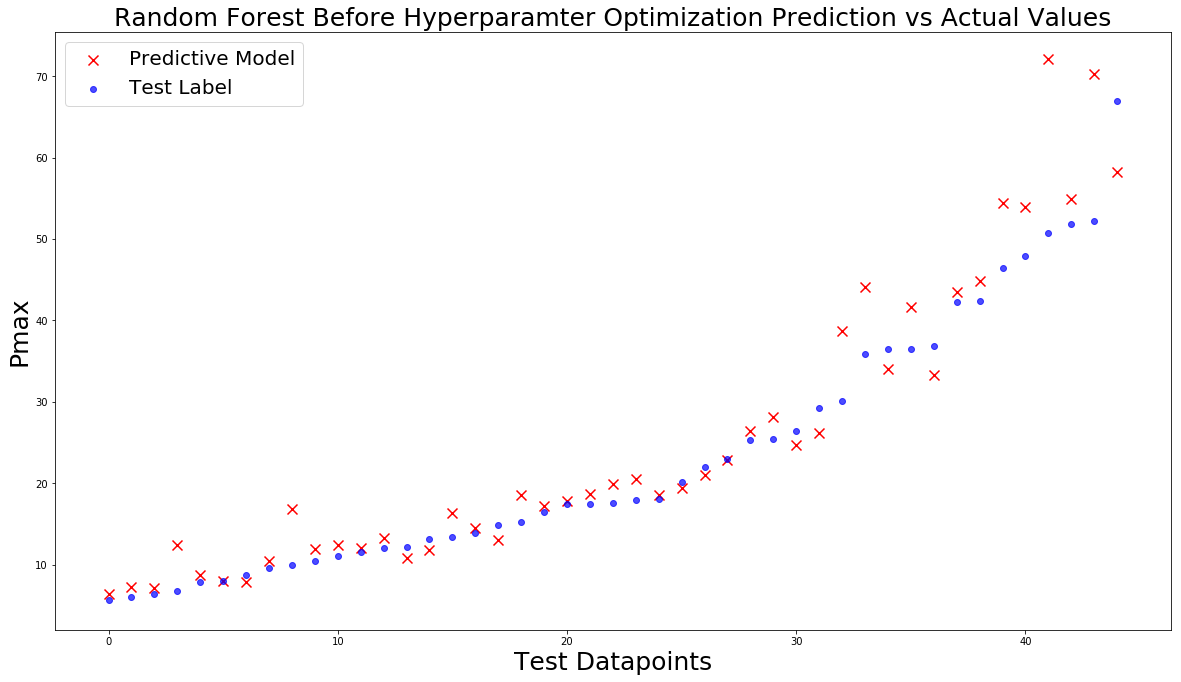

In [15]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Random Forest Before Hyperparamter Optimization Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("FT_before_CV_hyperparameter.png")